In [1]:
RD=[[],[],[]]
for n in range(3):
    # read only 100 points in each gorup
    with open(f"./rd_Group16/Class{n+1}.txt",'r') as rd:
        points=0
        for i in rd.readlines():
            points+=1
            a,b = i.split(" ")[0:2];
            a,b = float(a), float(b)
            # if(points<100):
            RD[n].append([a,b])

In [2]:
from matplotlib import  pyplot as plt

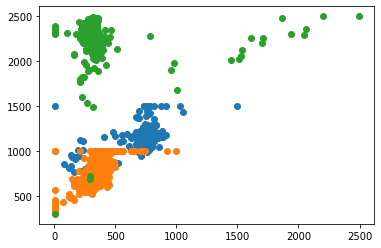

In [3]:
for cls in RD:
    plt.scatter([i[0] for i in cls],[i[1] for i in cls])

In [4]:
for i in RD:
    print(len(i))

2164
2488
2388


In [5]:
from GMM_MODEL import *

c:\Users\Vaibhav\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
print(len(RD))

3


In [7]:
# splitting the data into train data and test data
def SplitList(l,ratio):
    middle = round(len(l)*ratio)
    return l[:middle] ,l[middle:]
TrainData = []
TestData = []
for cls in RD:
    # Train, Test = SplitList(cls, 0.7)
    # savinng first 100 points for training and rest for testing
    Train, Test = cls[:100], cls[100:]
    
    TrainData.append(Train)
    TestData.append(Test)
    

In [8]:
K=4
model=Bayes_Classifier_GMM(K)

In [9]:
likelihood = model.train(TrainData,20)

center : [[695.1822916666666, 1151.953125], [708.7673611111111, 1150.390625], [701.8229166666666, 1143.2291666666667], [756.5369897959183, 1127.9496173469388]]
center : [[695.1822916666666, 1151.953125], [715.46875, 1146.5625], [702.4739583333334, 1145.8333333333333], [764.9238782051282, 1124.7996794871794]]
center : [[694.8939732142857, 1152.2042410714287], [723.335597826087, 1140.4551630434783], [703.61328125, 1148.681640625], [770.8333333333334, 1124.0530303030303]]
center : [[694.8939732142857, 1152.2042410714287], [726.3671875, 1137.109375], [705.2734375, 1149.21875], [771.8505859375, 1124.267578125]]
center : [[695.1822916666666, 1151.953125], [729.235197368421, 1132.6069078947369], [707.7752976190476, 1149.3675595238096], [773.828125, 1125.0]]
1
[[695.1822916666666, 1151.953125], [729.235197368421, 1132.6069078947369], [707.7752976190476, 1149.3675595238096], [773.828125, 1125.0]]


c:\Users\Vaibhav\Desktop\vaibhav programming\Mtech_sem1\Pattern Recognition\Assignment2\GMM_MODEL.py:291: RuntimeWarning: divide by zero encountered in log10
  likelihood+=np.log10(l)


total log likelihood -inf
percentage change in mean : [0.01873005 0.02078336]
percentage change in mean : [0.07987971 0.05849015]
2
[array([ 695.31249964, 1151.71371045]), array([ 729.81770834, 1131.94444444]), array([ 708.7053557 , 1149.36755872]), array([ 766.25   , 1116.40625])]
total log likelihood -644.3188917411043
percentage change in mean : [0.01901355 0.01501656]
percentage change in mean : [0.15133693 0.13684444]
3
[array([ 695.44470322, 1151.88665818]), array([ 728.71322462, 1133.49344747]), array([ 707.055868  , 1149.32691091]), array([ 773.73677532, 1124.96987998])]
total log likelihood -356.99932305060764
percentage change in mean : [0.00027721 0.00933832]
percentage change in mean : [0.07876873 0.07405393]
4
[array([ 695.44277542, 1151.99422502]), array([ 728.13922644, 1134.33284391]), array([ 705.94546307, 1149.31292298]), array([ 773.71836897, 1124.96962763])]
total log likelihood -356.52938056598566
percentage change in mean : [0.0107981  0.00657916]
percentage change

c:\Users\Vaibhav\Desktop\vaibhav programming\Mtech_sem1\Pattern Recognition\Assignment2\GMM_MODEL.py:329: RuntimeWarning: invalid value encountered in divide
  new_clusters[i].mean=sums[i]/Effective_num_of_points[i]


total log likelihood -inf
percentage change in mean : [3.21888412 0.38958571]
2
[array([313.15104167, 687.82552083]), array([350.3815407 , 735.10174419]), array([311.328125 , 775.9765625]), array([nan, nan])]


c:\Users\Vaibhav\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


ValueError: array must not contain infs or NaNs

In [ ]:
print(likelihood)

[[[1, -inf]], [[1, -inf]], [[1, -inf]]]


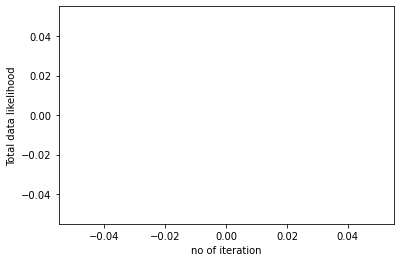

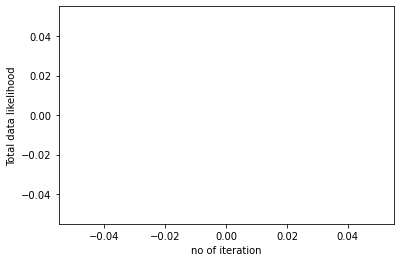

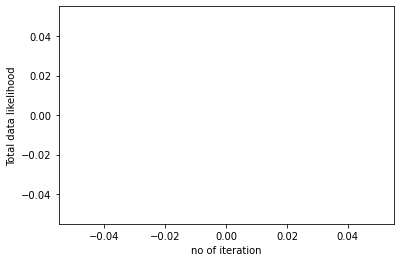

In [ ]:
for l in likelihood:
    plt.plot([L[0] for L in l],[L[1] for L in l])
    plt.xlabel("no of iteration")
    plt.ylabel("Total data likelihood")
    plt.show()

In [ ]:
confusion = model.test(TestData)
confusion.print()

confusion matrix: 
[[2000.   64.    0.]
 [1100. 1288.    0.]
 [1981.    2.  305.]]
accuracy:  0.533086053412463
precision:  [0.39362330249950794, 0.9512555391432792, 1.0]
recall:  [0.9689922480620154, 0.5393634840871022, 0.1333041958041958]
f1_score:  [0.5598320503848845, 0.688401924104757, 0.23524874662553028]


In [ ]:
model.plot_decision_regions_2d(f"RD K={K}",TrainData)

ValueError: array must not contain infs or NaNs

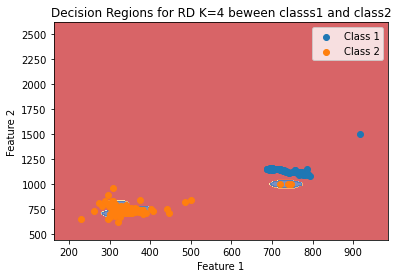

KeyboardInterrupt: 

In [ ]:
model.plot_decision_regions_for_each_pair_of_classes(f"RD K={K}",TrainData)

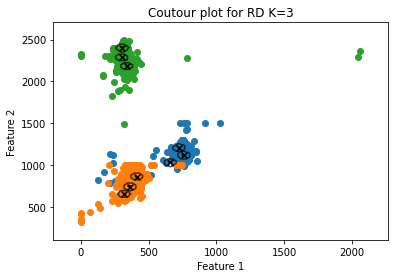

In [ ]:
model.plot_contour(f"RD K={K}",TrainData)